# Cambio de Frecuencias de Variables Macroeconómicas

In [6]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

## Carga para evaluar correlaciones

In [7]:
# importar data
df_t = pd.read_csv('python_total.csv', delimiter=';', index_col=0,parse_dates=True, decimal=',')
df_t.head()
df_t= df_t.sort_index()
df_t['mes'] = df_t.index.month
df_t.info()
df_t.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2014-01-01 to 2021-09-01
Columns: 101 entries, mora to mes
dtypes: float64(100), int64(1)
memory usage: 74.1 KB


(93, 101)

In [10]:
sub = 'mora'
mora=df_t.columns[df_t.columns.str.startswith(sub)]

In [11]:
df_t = df_t.drop(mora, axis=1)

In [12]:
df_t.columns

Index(['pib_cons', 'pib_corr', 'deuda', 'imae', 'imae_s', 'ipc', 'bvpsi',
       'fob', 'zl_mtm', 'zl_impm', 'zl_rexm', 'acp_pm', 'acp_tbm', 'acp_tnm',
       'mcp', 'visitas', 'entrada', 'gastotur', 'rho_hp', 'rho_hs', 'ibm',
       'iim', 'banano', 'vacuno', 'porcino', 'pollo', 'cerveza', 'licor',
       'gasolina', 'diesel', 'pconst', 'pconst_cdad', 'pconst_interior',
       'concreto', 'cemento', 'itmbs', 'autos', 'apuestas', 'g_electricidad',
       'f_electricidad', 'depósitos', 'préstamos', 'hipotecarios', 'comercio',
       'consumo', 'construcción', 'primas', 'itm', 'itdm', 'intm', 'activan',
       'pasivan', 'activar', 'pasivar', 'dp_pib', 'ied', 'ied_bancos',
       'ied_empresas', 'pib_const_a', 'pib_const_b', 'pib_const_c',
       'pib_const_d', 'pib_const_e', 'pib_const_f', 'pib_const_g',
       'pib_const_h', 'pib_const_i', 'pib_const_j', 'pib_const_k',
       'pib_const_m', 'pib_const_n', 'pib_const_o', 'pib_const_f.1',
       'pib_const_k.1', 'pib_const_p', 'ingresos_

In [16]:
correlacion = df_t.corr()

In [5]:
#plt.matshow(correlacion)
#plt.show

In [17]:
correlacion.style.background_gradient(cmap='coolwarm')

C:\Users\vblanco\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\vblanco\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [20]:
imae_corr = pd.DataFrame(correlacion.imae)

In [21]:
corr_50 = imae_corr[imae_corr['imae']>=0.5]

<AxesSubplot:>

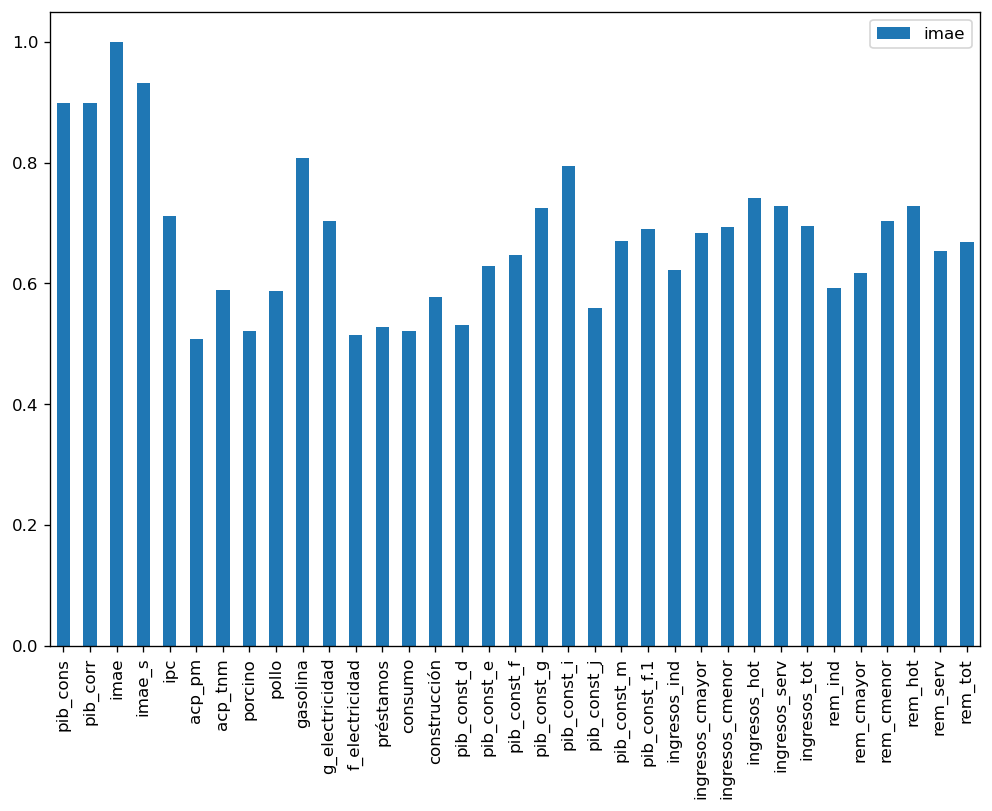

In [22]:
corr_50.plot.bar()

In [23]:
var = ['pib_cons','pib_corr','ied','ied_bancos','ied_empresas','pib_const_a','pib_const_b','pib_const_c','pib_const_d','pib_const_e','pib_const_f',
       'pib_const_g','pib_const_h','pib_const_i','pib_const_j','pib_const_k','pib_const_m','pib_const_n','pib_const_o',
       'pib_const_f','pib_const_k','pib_const_p','ingresos_ind','ingresos_cmayor','ingresos_cmenor','ingresos_hot','ingresos_serv',
        'ingresos_tot','rem_ind','rem_cmayor','rem_cmenor','rem_hot','rem_serv','rem_tot']

<AxesSubplot:>

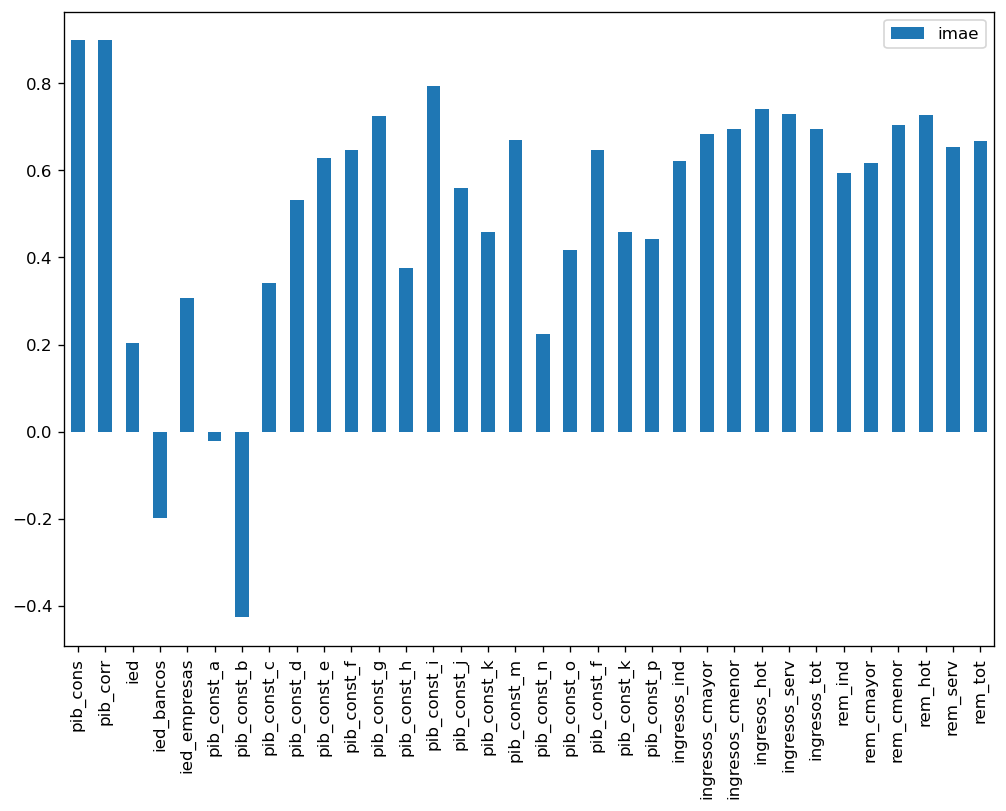

In [24]:
imae_corr.loc[var,].plot.bar()

In [13]:
# se evidencia relación débil entre el Imae y ied, pib_constante_a,c,n
# a= agricultura
# c= Explotación de minas y canteras
# n= Actividades de servicios sociales y de salud privada  (no lo voy a tomar en cuenta)
# h= Hoteles y restaurantes

### Analisis sobre el IED

In [25]:
ied_corr = pd.DataFrame(correlacion.ied)
ied_corr[ied_corr['ied']>=0.5].head()

,ied
bvpsi,0.615335
visitas,0.731010
entrada,0.764165
gastotur,0.718863
pconst,0.535275


C:\Users\vblanco\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vblanco\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.6153354035550979
0.6775246188640843


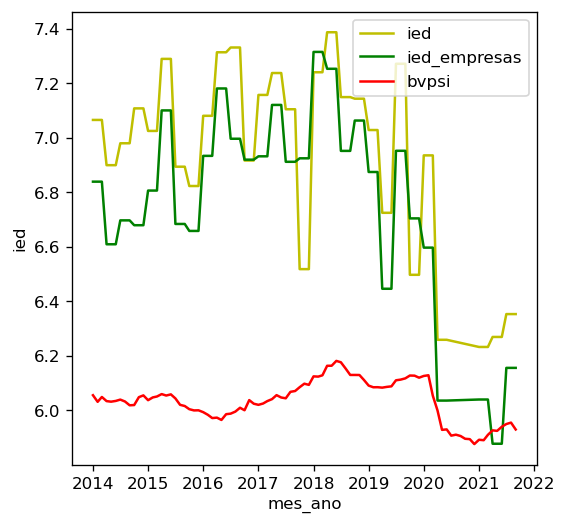

In [26]:
fig,ax =  plt.subplots( 1, 1, figsize = ( 5, 5))
ied =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'ied']), data = df_t, color = 'y')
ied_empresas =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'ied_empresas']), data = df_t, color = 'g')
bvpsi= sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'bvpsi']), data = df_t, color = 'r')
ax.legend(['ied', 'ied_empresas', 'bvpsi'])
print(correlacion.ied.bvpsi)
print(correlacion.ied_empresas.bvpsi)

In [27]:
ied_banco_corr = pd.DataFrame(correlacion.ied_bancos)
ied_banco_corr[ied_banco_corr['ied_bancos']<=-0.4]
#ied_banco_corr[ied_banco_corr['ied_bancos']>=0.4]

,ied_bancos
acp_pm,-0.410184
pib_const_j,-0.438715
ingresos_cmenor,-0.456163


C:\Users\vblanco\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-0.4101840320199401


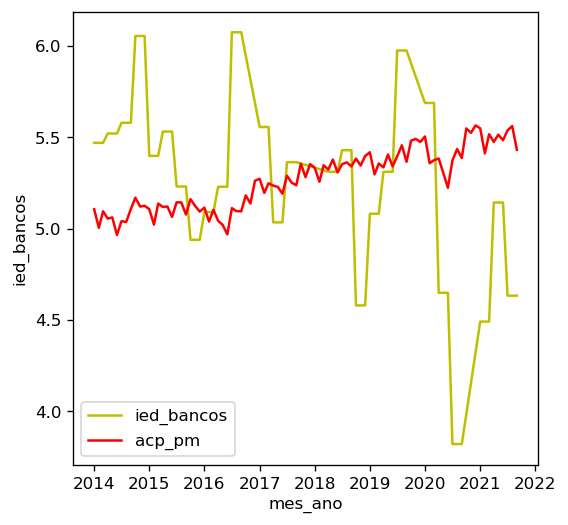

In [28]:
fig,ax =  plt.subplots( 1, 1, figsize = ( 5, 5))
ied_bancos =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'ied_bancos']), data = df_t, color = 'y')
#ied_empresas =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'ied_empresas']), data = df_t, color = 'g')
acp_pm= sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'acp_pm']), data = df_t, color = 'r')
ax.legend(['ied_bancos', 'acp_pm'])
print(correlacion.ied_bancos.acp_pm)

### Analisis sobre el PIB

In [29]:
pib_const_a_corr = pd.DataFrame(correlacion.pib_const_a)
pib_const_a_corr[pib_const_a_corr['pib_const_a']>=0.5].sort_values('pib_const_a').tail()
#pib_const_a_corr[pib_const_a_corr['pib_const_a']<=-0.5]
#print(correlacion.pib_const_h.visitas)

,pib_const_a
activan,0.625135
deuda,0.635347
mcp,0.637931
pib_const_n,0.810476
pib_const_a,1.000000


In [30]:
pib_const_c_corr = pd.DataFrame(correlacion.pib_const_c)
pib_const_c_corr[pib_const_c_corr['pib_const_c']>=0.5].sort_values('pib_const_c').tail()
#print(correlacion.pib_const_h.visitas)

,pib_const_c
fob,0.793273
depósitos,0.794330
dp_pib,0.800973
deuda,0.833521
pib_const_c,1.000000


0.6353465509969731
0.5474352068593731
0.6379309402695816


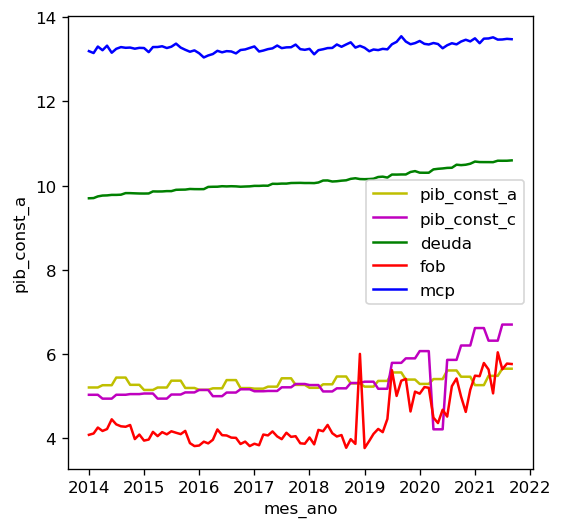

In [31]:
fig,ax =  plt.subplots( 1, 1, figsize = ( 5, 5))
pib_const_a =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'pib_const_a']), data = df_t, color = 'y')
pib_const_c =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'pib_const_c']), data = df_t, color = 'm')
deuda =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'deuda']), data = df_t, color = 'g')
fob= sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'fob']), data = df_t, color = 'r')
mcp= sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'mcp']), data = df_t, color = 'blue')
ax.legend(['pib_const_a', 'pib_const_c','deuda', 'fob', 'mcp'])
print(correlacion.pib_const_a.deuda)
print(correlacion.pib_const_a.fob)
print(correlacion.pib_const_a.mcp)

In [32]:
pib_const_h_corr = pd.DataFrame(correlacion.pib_const_h)
pib_const_h_corr[pib_const_h_corr['pib_const_h']>=0.5].sort_values('pib_const_h').tail()
#print(correlacion.pib_const_h.visitas)

,pib_const_h
pib_const_f.1,0.860747
entrada,0.899819
pib_const_f,0.900008
visitas,0.928166
pib_const_h,1.000000


C:\Users\vblanco\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9281655945337085


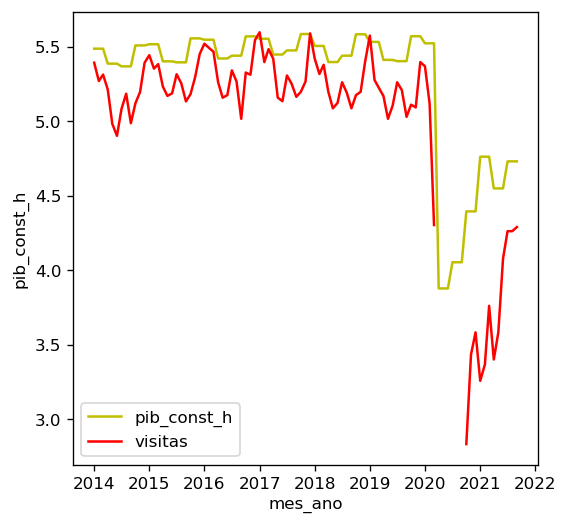

In [33]:
fig,ax =  plt.subplots( 1, 1, figsize = ( 5, 5))
pib_const_h =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'pib_const_h']), data = df_t, color = 'y')
#ied_empresas =sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'ied_empresas']), data = df_t, color = 'g')
visitas= sns.lineplot( x = df_t.index, y = np.log(df_t.loc[:,'visitas']), data = df_t, color = 'r')
ax.legend(['pib_const_h', 'visitas'])
print(correlacion.pib_const_h.visitas)

In [23]:
#corr_50.sort_values

In [24]:
# imae
# pib_cons,pib_corr,pib_const_d,pib_const_e,pib_const_f,pib_const_g,pib_const_i,pib_const_j,pib_const_m,ingresos_ind,
# ingresos_cmayor,ingresos_cmenor,ingresos_hot,ingresos_serv,ingresos_tot,rem_ind,rem_cmayor,rem_cmenor,rem_hot,rem_serv,rem_tot

# bvpsi
# ied, ied_empresas

# acp_pm
# ied_bancos

# fob
# funcionaba con deuda pero ver el archivo "relacion deuda vs credicto agro.xlsx"

# pib_const_a
# pib_const_c

# visitas
# pib_const_h

# Señales Estacionales

In [34]:
# importar data
df = pd.read_csv('python_mes.csv', delimiter=';', index_col=0,parse_dates=True, decimal=',')
df.head()
df= df.sort_index()
df['mes'] = df.index.month
#df.info()
df.shape

(95, 67)

In [26]:
#df.isnull().sum()

In [35]:
# Descomposicion de la series en componentes
from statsmodels.tsa.seasonal import seasonal_decompose

def descomposicion(data, periodo):
# Multiplicative Decomposition
    result_mul= seasonal_decompose(data[variable], model='multiplicative', extrapolate_trend='freq', period=periodo)
    globals()['df_reconstructed_mul_' + variable] = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
   # Additive Decomposition
    result_add = seasonal_decompose(data[variable], model='additive', extrapolate_trend='freq', period=periodo)
    globals()['df_reconstructed_add_' + variable]  = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)

In [36]:
for variable in ('imae', 'bvpsi', 'acp_pm','fob'):
    descomposicion(data=df, periodo=12)

In [37]:
def descomposicion_grafico(data):
    fig,ax =  plt.subplots( 2, 2, figsize = ( 10, 8))
    sns.lineplot( x = data.index, y = data.iloc[:,3], data = data, color = 'y', ax = ax[1][1])
    sns.lineplot( x = data.index, y = data.iloc[:,1], data = data, color = 'g', ax = ax[0][0])
    sns.lineplot( x = data.index, y = data.iloc[:,0], data = data, color = 'b', ax = ax[0][1])
    sns.lineplot( x = data.index, y = data.iloc[:,2], data = data, color = 'r', ax = ax[1][0])

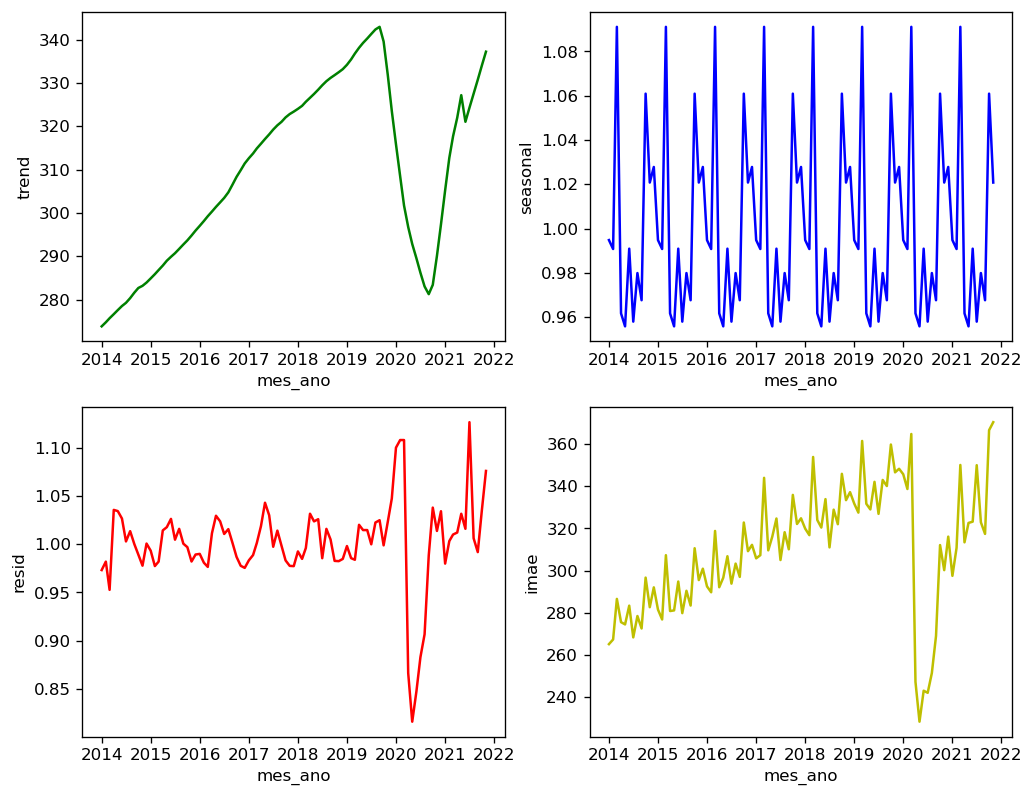

In [38]:
descomposicion_grafico(df_reconstructed_mul_imae)

In [39]:
pesos_est = pd.DataFrame(df_reconstructed_mul_imae) 
pesos_est.index = df.index
pesos_est['mes'] = df.index.month
weight_imae = pesos_est.groupby('mes').seasonal.mean()
weight_imae

mes
1     0.994788
2     0.990755
3     1.091082
4     0.961698
5     0.955828
6     0.990904
7     0.957955
8     0.979892
9     0.967623
10    1.060907
11    1.020765
12    1.027804
Name: seasonal, dtype: float64

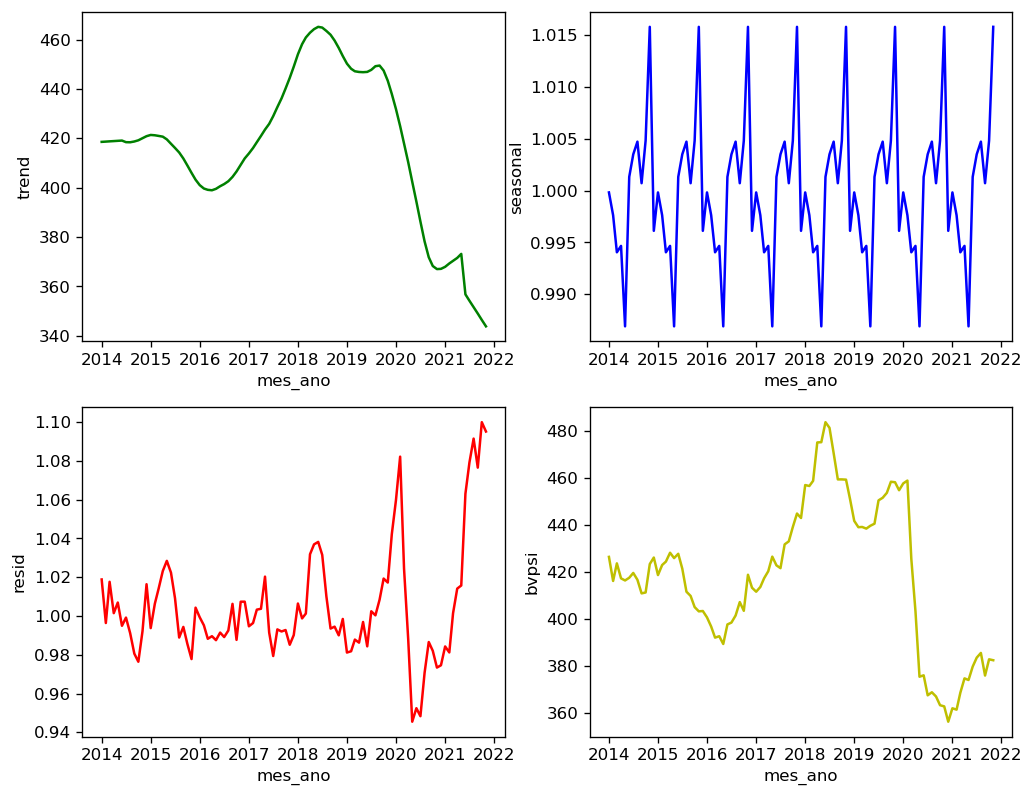

In [40]:
descomposicion_grafico(df_reconstructed_mul_bvpsi)

In [41]:
pesos_est = pd.DataFrame(df_reconstructed_mul_bvpsi) 
pesos_est.index = df.index
pesos_est['mes'] = df.index.month
weight_bvpsi = pesos_est.groupby('mes').seasonal.mean()
weight_bvpsi

mes
1     0.999819
2     0.997622
3     0.994048
4     0.994666
5     0.986910
6     1.001316
7     1.003493
8     1.004713
9     1.000708
10    1.004808
11    1.015780
12    0.996117
Name: seasonal, dtype: float64

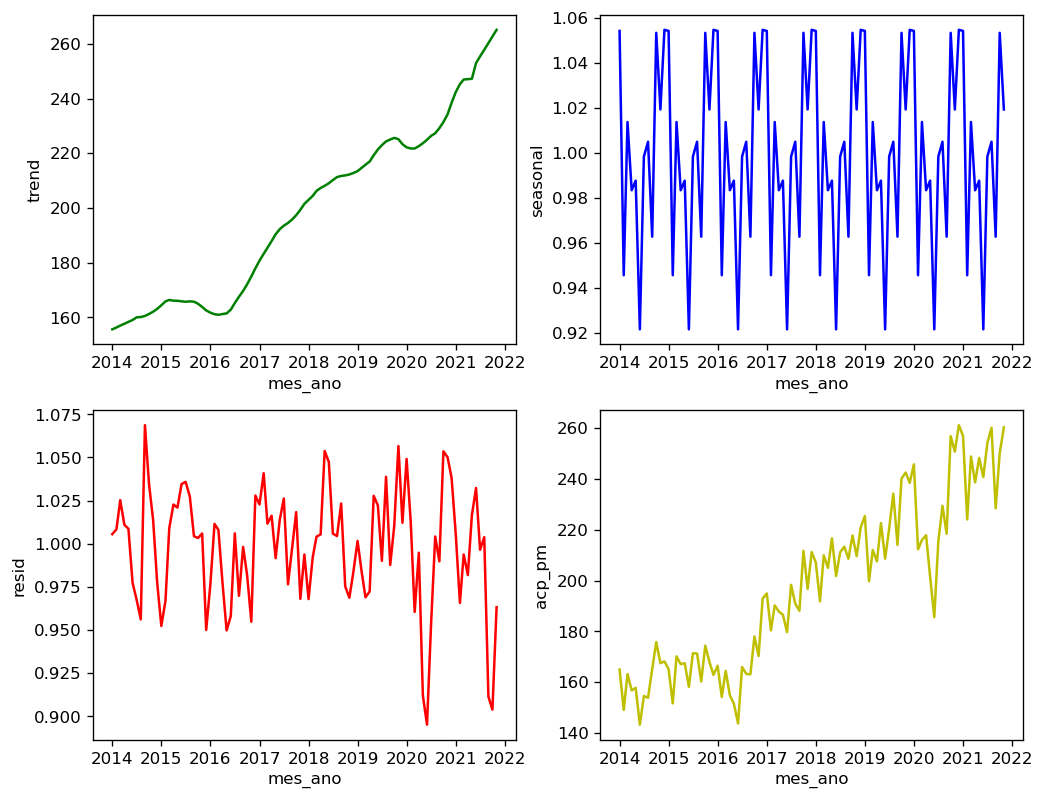

In [42]:
descomposicion_grafico(df_reconstructed_mul_acp_pm)

In [43]:
pesos_est = pd.DataFrame(df_reconstructed_mul_acp_pm) 
pesos_est.index = df.index
pesos_est['mes'] = df.index.month
weight_acp_pm = pesos_est.groupby('mes').seasonal.mean()
weight_acp_pm

mes
1     1.054175
2     0.945728
3     1.013739
4     0.983460
5     0.987711
6     0.921699
7     0.998391
8     1.004977
9     0.962819
10    1.053334
11    1.019308
12    1.054658
Name: seasonal, dtype: float64

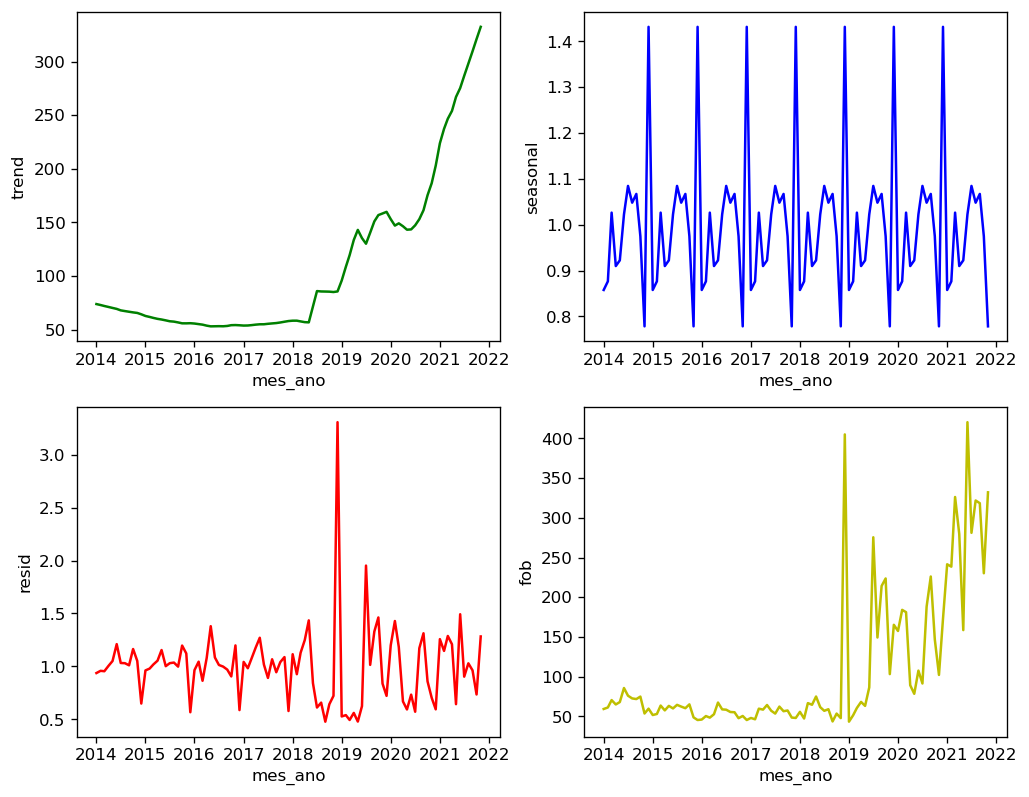

In [44]:
descomposicion_grafico(df_reconstructed_mul_fob)

In [45]:
pesos_est = pd.DataFrame(df_reconstructed_mul_fob) 
pesos_est.index = df.index
pesos_est['mes'] = df.index.month
weight_fob = pesos_est.groupby('mes').seasonal.mean()
weight_fob

mes
1     0.857614
2     0.876395
3     1.026395
4     0.909791
5     0.922304
6     1.022578
7     1.084682
8     1.048082
9     1.067169
10    0.974893
11    0.778222
12    1.431875
Name: seasonal, dtype: float64

### Tratamiento sobre la variable visitas porque tenía valores nulos

In [46]:
visitas_2019 = df_t.loc['2014-01-01':'2019-12-01']['visitas']

In [47]:
result_mul_visitas_2019= seasonal_decompose(visitas_2019, model='multiplicative', extrapolate_trend='freq', period=12)
df_reconstructed_mul_visitas_2019 = result_mul_visitas_2019.seasonal
pesos_est = pd.DataFrame(df_reconstructed_mul_visitas_2019) 
pesos_est.index = visitas_2019.index
pesos_est['mes'] = visitas_2019.index.month
weight_visitas_2019 = pesos_est.groupby('mes').seasonal.mean()
weight_visitas_2019

mes
1     1.264371
2     1.094292
3     1.118862
4     0.984344
5     0.841934
6     0.849790
7     0.989866
8     0.953473
9     0.816641
10    0.917623
11    0.957169
12    1.211633
Name: seasonal, dtype: float64

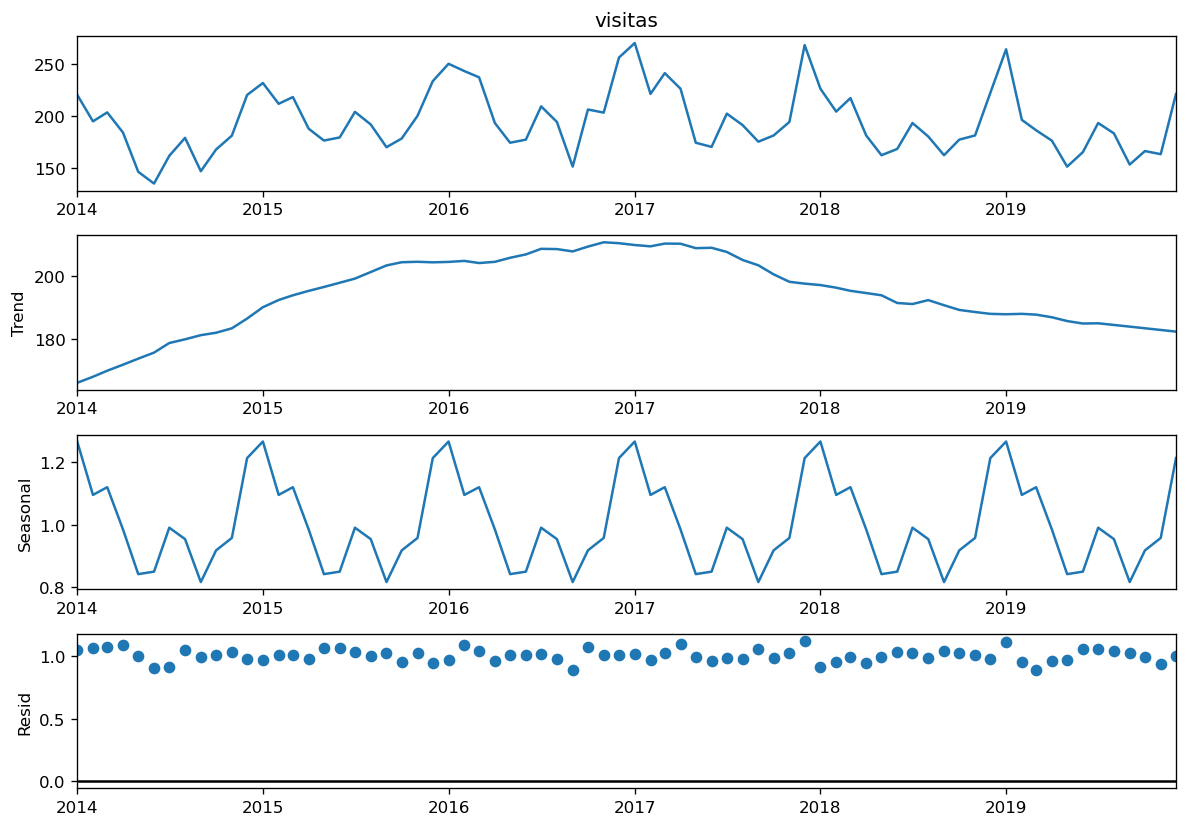

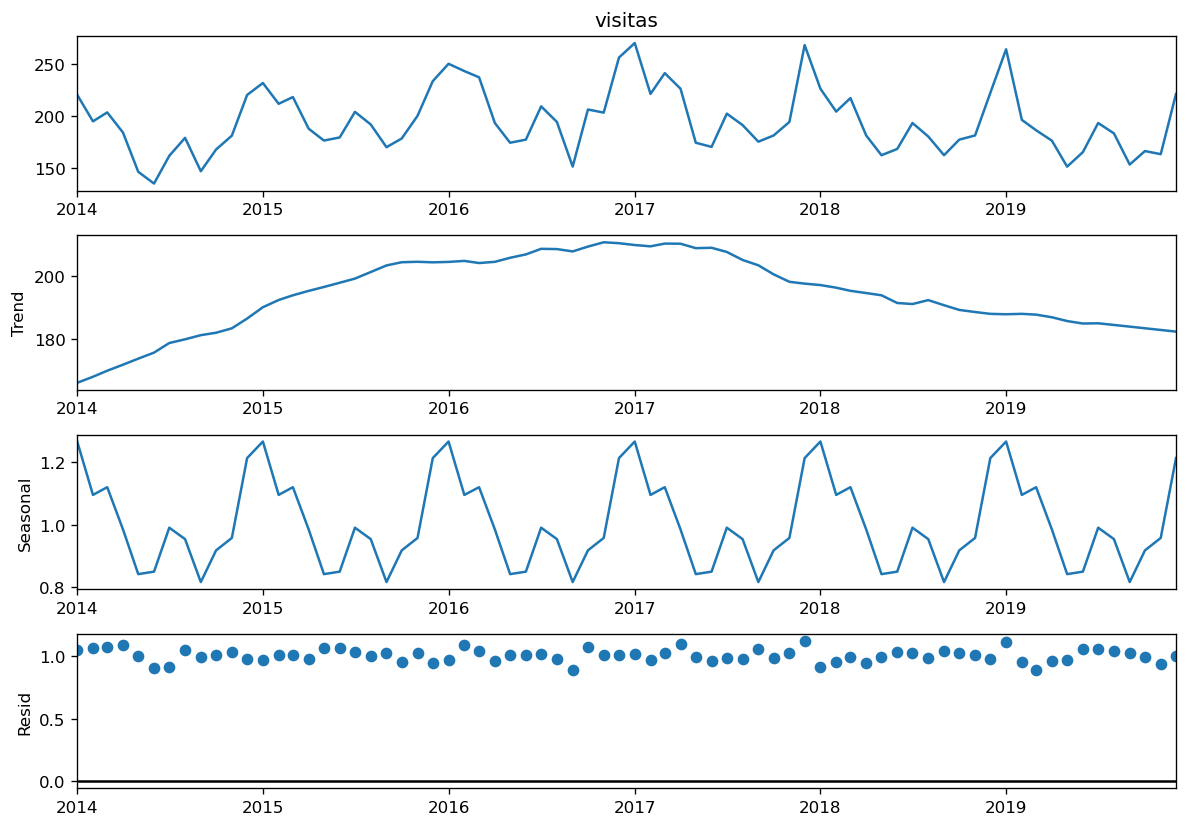

In [48]:
result_mul_visitas_2019.plot()

In [49]:
df_t1 = df_t.copy()

In [50]:
df_t2 = df_t1.merge(weight_imae, how='left', on='mes')
df_t2.rename(columns={'seasonal': 'weight_imae'}, inplace= True)
df_t2 = df_t2.merge(weight_bvpsi, how='left', on='mes')
df_t2.rename(columns={'seasonal': 'weight_bvpsi'}, inplace= True)
df_t2 = df_t2.merge(weight_acp_pm, how='left', on='mes')
df_t2.rename(columns={'seasonal': 'weight_acp_pm'}, inplace= True)
df_t2 = df_t2.merge(weight_fob, how='left', on='mes')
df_t2.rename(columns={'seasonal': 'weight_fob'}, inplace= True)
df_t2 = df_t2.merge(weight_visitas_2019, how='left', on='mes')
df_t2.rename(columns={'seasonal': 'weight_visitas_2019'}, inplace= True)

In [53]:
df_t2.iloc[:,89:]

,weight_bvpsi,weight_acp_pm,weight_fob,weight_visitas_2019
0,0.999819,1.054175,0.857614,1.264371
1,0.997622,0.945728,0.876395,1.094292
2,0.994048,1.013739,1.026395,1.118862
3,0.994666,0.983460,0.909791,0.984344
4,0.986910,0.987711,0.922304,0.841934
...,...,...,...,...
88,0.986910,0.987711,0.922304,0.841934
89,1.001316,0.921699,1.022578,0.849790
90,1.003493,0.998391,1.084682,0.989866
91,1.004713,1.004977,1.048082,0.953473


In [44]:
# graficos dividiendo las serie
# fig,ax =  plt.subplots( 2, 2, figsize = ( 10, 8))
# sns.lineplot( x = df.index, y = 'lmae', data = df, color = 'g', ax = ax[0][0])
# sns.lineplot( x = df.index, y = 'deuda', data = df, color = 'b', ax = ax[0][1])
# sns.lineplot( x = df.index, y = 'activar', data = df, color = 'r', ax = ax[1][0])
# sns.lineplot( x = df.index, y = 'pasivar', data = df, color = 'y', ax = ax[1][1])

In [45]:
#imae 
# pib_cons,pib_corr,pib_const_d,pib_const_e,pib_const_f,pib_const_g,pib_const_i,pib_const_j,pib_const_m,ingresos_ind,
# ingresos_cmayor,ingresos_cmenor,ingresos_hot,ingresos_serv,ingresos_tot,rem_ind,rem_cmayor,rem_cmenor,rem_hot,rem_serv,rem_tot

In [57]:
df_t3 = df_t2.copy()

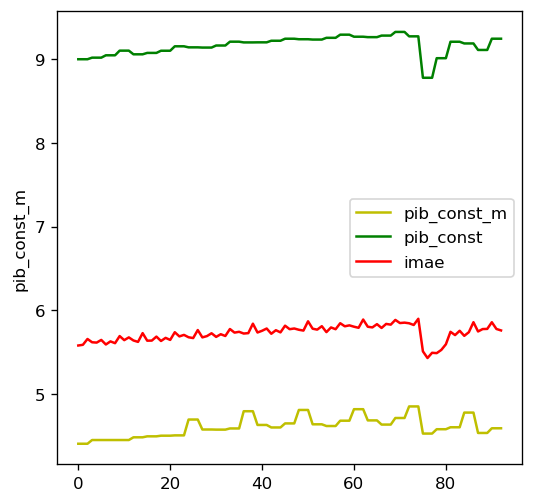

In [67]:
fig,ax =  plt.subplots( 1, 1, figsize = ( 5, 5))
pib_const_m =sns.lineplot( x = df_t3.index, y = np.log(df_t3.loc[:,'pib_const_m'])
                          , data = df_t3, color = 'y')
pib_const =sns.lineplot( x = df_t3.index, y = np.log(df_t3.loc[:,'pib_cons']), data = df_t3, color = 'g')
imae =sns.lineplot( x = df_t3.index, y = np.log(df_t3.loc[:,'imae']), data = df_t3, color = 'r')
ax.legend(['pib_const_m', 'pib_const', 'imae'])

In [68]:
var_imae = ['pib_cons','pib_corr','pib_const_d','pib_const_e','pib_const_f','pib_const_g','pib_const_i','pib_const_j',
            'pib_const_m','ingresos_ind','ingresos_cmayor','ingresos_cmenor','ingresos_hot','ingresos_serv','ingresos_tot',
            'rem_ind','rem_cmayor','rem_cmenor','rem_hot','rem_serv','rem_tot','weight_imae' ]

df_t21 = df_t2[var_imae]
df_t22 = df_t21.apply(lambda x :df_t21['weight_imae']/3 * x)

In [69]:
var_bvpsi = ['ied', 'ied_empresas', 'weight_bvpsi']
df_t31 = df_t2[var_bvpsi]
df_t32 = df_t31.apply(lambda x :df_t31['weight_bvpsi']/3 * x)

In [70]:
var_acp_pm = ['ied_bancos', 'weight_acp_pm']
df_t41 = df_t2[var_acp_pm]
df_t42 = df_t41.apply(lambda x :df_t41['weight_acp_pm']/3 * x)

In [71]:
var_fob = ['pib_const_a', 'pib_const_c', 'weight_fob']
df_t51 = df_t2[var_fob]
df_t52 = df_t51.apply(lambda x :df_t51['weight_fob']/3 * x)

In [72]:
var_visitas = ['pib_const_h', 'weight_visitas_2019']
df_t61 = df_t2[var_visitas]
df_t62 = df_t61.apply(lambda x :df_t61['weight_visitas_2019']/3 * x)

In [73]:
df_t4 = pd.concat([df_t22, df_t32, df_t42, df_t52, df_t62], axis=1)
df_t4.index = df_t.index
#df_t4

In [74]:
df_t5 = df_t4.drop(['weight_visitas_2019', 'weight_imae', 'weight_bvpsi', 'weight_fob', 'weight_acp_pm'], axis=1)
var_mensual = list(df_t5.columns.values)
#var_mensual

In [ ]:
#df_t[var_mensual]

In [75]:
df1 = df_t[df_t.columns[~df_t.columns.isin(var_mensual)]]

In [76]:
#df1.head()
# n = Actividades de servicios sociales y de salud privada  (no lo voy a tomar en cuenta)
# p = Hogares privados con servicios domésticos
# b = Pesca
# o = Otras actividades comunitarias, sociales  y personales de servicios (casinos, lotería y otros)
df1 =df1.drop(['pib_const_b','pib_const_k','pib_const_n','pib_const_o','pib_const_f.1','pib_const_k.1','pib_const_p'], axis=1)